<a href="https://colab.research.google.com/github/valesierrai/Aprendizaje-No-Supervisado-para-el-AD/blob/main/Reduccion_dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive # conexión con drive
drive.mount('/content/drive')
import pandas as pd # Manejo de Data Frame
import numpy as np # Manejo matricial
import warnings # Omitir warnings
warnings.filterwarnings("ignore") # Ignorar warning (me estresan los warnings >:|)
# librerías para Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Librerías para clustering
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN)
from sklearn.decomposition import PCA # Análisis de componentes principales
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
# Score de silueta
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler # estandarizar variables.

Mounted at /content/drive


In [ ]:
datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprendizaje No Supervisado/CC GENERAL.csv")
datos = datos.drop( ["CUST_ID", "TENURE"], axis=1).dropna()
datos_marketing = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprendizaje No Supervisado/marketing_campaign.csv", sep="\t")
datos_marketing=datos_marketing.dropna()

# Coeficientes de Correlación


##**Coeficiente de Correlación PEARSON**

El **coeficiente de correlación de Pearson** mide la relación lineal entre dos variables continuas. Su fórmula es:

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

Donde:
- $r$ es el coeficiente de correlación de Pearson.
- $x_i$ e $y_i$ son los valores de las variables \(X\) e \(Y\) para cada observación.
- $\bar{x}$ y $\bar{y}$ son las medias de las variables \(X\) e \(Y\), respectivamente.

Este coeficiente varía entre -1 y 1:
- \(r = 1\) indica una correlación positiva perfecta.
- \(r = -1\) indica una correlación negativa perfecta.
- \(r = 0\) indica que no hay correlación lineal entre las variables.

<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

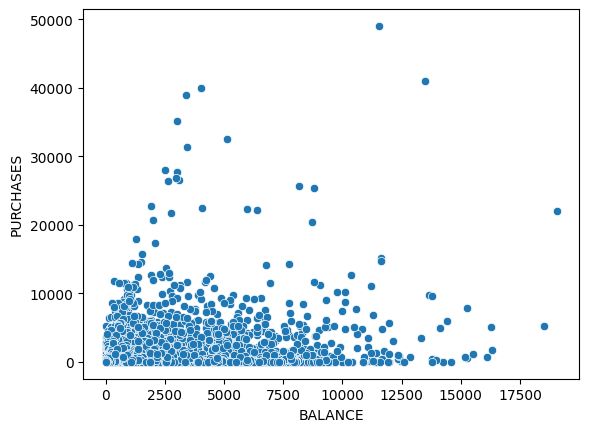

In [ ]:
sns.scatterplot( x=datos["BALANCE"], y=datos["PURCHASES"])

Visualemente observamos una posible relación entre BALANCE y PURCHASES. Pero ¿qué tan alta es la relación?


In [ ]:
np.corrcoef( datos["BALANCE"], datos["PURCHASES"])

array([[1.        , 0.17608309],
       [0.17608309, 1.        ]])

Con el coeficiente de correlación podemos entender el grado de relación entre dos variables.

<Axes: xlabel='BALANCE', ylabel='PRC_FULL_PAYMENT'>

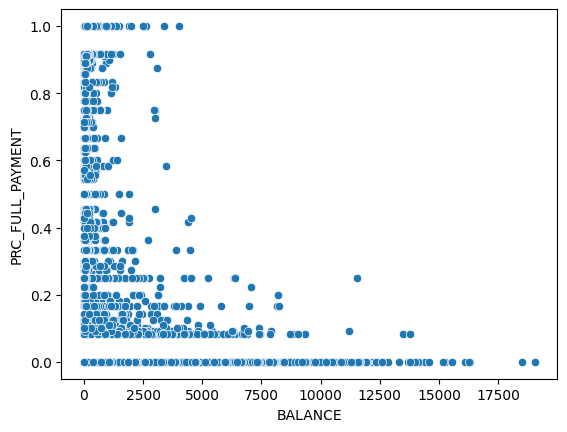

In [ ]:
sns.scatterplot( x=datos["BALANCE"], y=datos["PRC_FULL_PAYMENT"])

¿Cómo es la relación entre estas variables?

Con pandas podemos obtener lo que se llama la matriz de correlación entre variables.

In [ ]:
datos.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001


<Axes: >

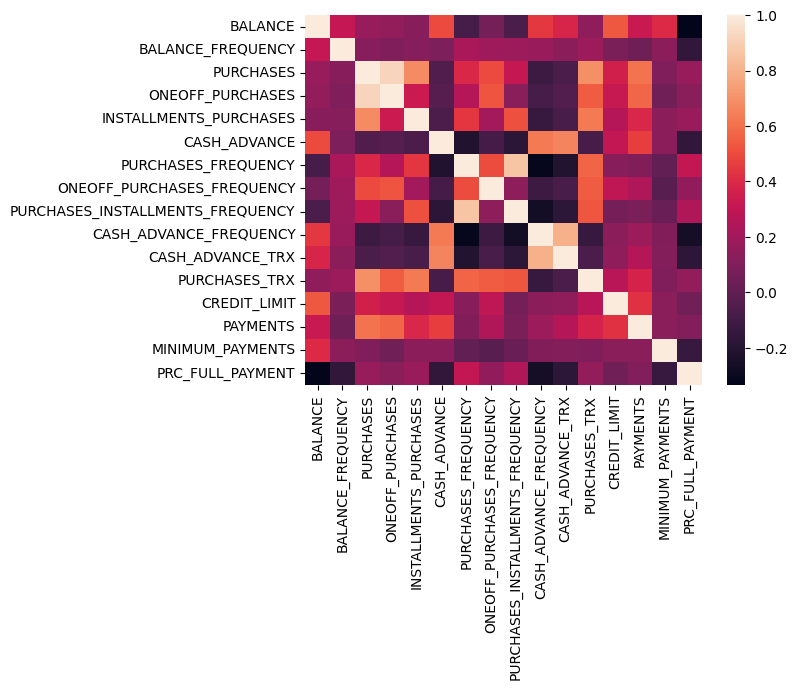

In [ ]:
sns.heatmap( datos.corr())

##**Correlación SPEARMAN**

Medir si existe algún tipo de relación ya sea lineal o no lineal.

El **coeficiente de correlación de Spearman** es una medida no paramétrica que evalúa la relación entre dos variables ordinales o continuas, basándose en los rangos de los datos en lugar de los valores originales. Su fórmula es:

$$
r_s = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

Donde:
- $r_s$ es el coeficiente de correlación de Spearman.
- $d_i$ es la diferencia entre los rangos de los dos valores correspondientes para cada observación.
- $n$ es el número de observaciones.

Este coeficiente varía entre -1 y 1:
- $r_s = 1$ indica una correlación positiva perfecta.
- $r_s = -1$ indica una correlación negativa perfecta.
- $r_s = 0$ indica que no hay correlación entre las variables.

<Axes: xlabel='PURCHASES', ylabel='ONEOFF_PURCHASES'>

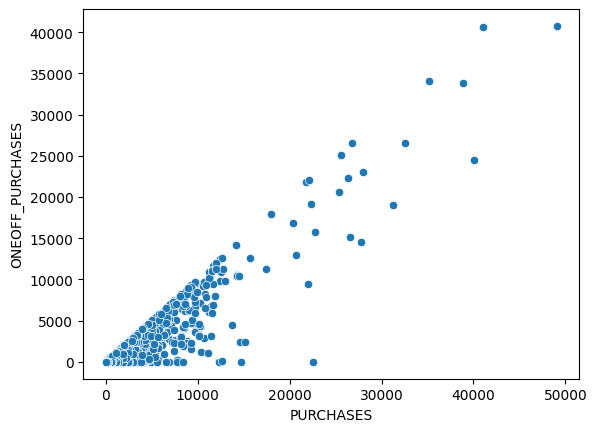

In [ ]:
#Graficamos dos variables que vemos que tienen una correalción
sns.scatterplot( x=datos["PURCHASES"], y=datos["ONEOFF_PURCHASES"])

<Axes: >

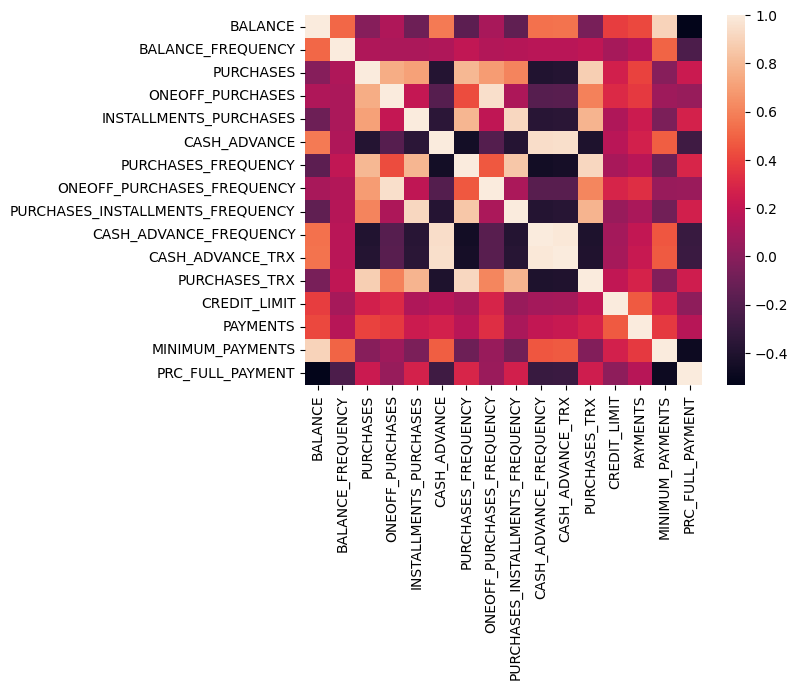

In [ ]:
sns.heatmap( datos.corr("spearman"))

<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='PURCHASES'>

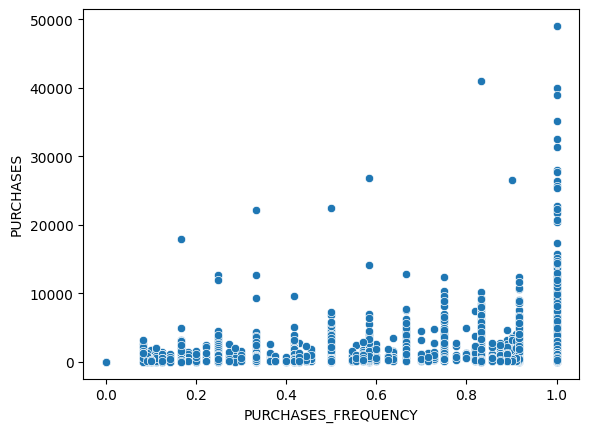

In [ ]:
#Graficamos dos variables
sns.scatterplot( y=datos["PURCHASES"], x=datos["PURCHASES_FREQUENCY"])

##**Correlación KENDALL**

Está más enfocado entre obtener la relación entre variable categóricas ordinales, con otra que sea ordinal también o sea de otro tipo.

El **coeficiente de correlación de Kendall** $\tau$ mide la asociación entre dos variables ordinales o continuas, evaluando la concordancia y discordancia entre los pares de observaciones. Su fórmula es:

$$
\tau = \frac{(n_c - n_d)}{\frac{1}{2}n(n-1)}
$$

Donde:
- $\tau$ es el coeficiente de correlación de Kendall.
- $n_c$ es el número de pares concordantes (pares en los que los valores de ambas variables varían en la misma dirección).
- $n_d$ es el número de pares discordantes (pares en los que los valores de las variables varían en direcciones opuestas).
- $n$ es el número de observaciones.

El valor de $\tau$ varía entre -1 y 1:
- $\tau = 1$ indica una concordancia perfecta.

---


- $\tau = -1$ indica una discordancia perfecta.
- $\tau = 0$ indica que no hay asociación.

Este coeficiente de correlación permite obtener una mejor precisión para la relación entre variables ordinales.

In [ ]:
datos_marketing["Education_level"] = datos_marketing["Education"].replace({'Graduation':2, 'PhD':4, 'Master':3, 'Basic':0, '2n Cycle':1} )

In [ ]:
datos_marketing["Education_level"].value_counts()

,count
Education_level,
2,1116
4,481
3,365
1,200
0,54


<Axes: xlabel='Education_level', ylabel='Income'>

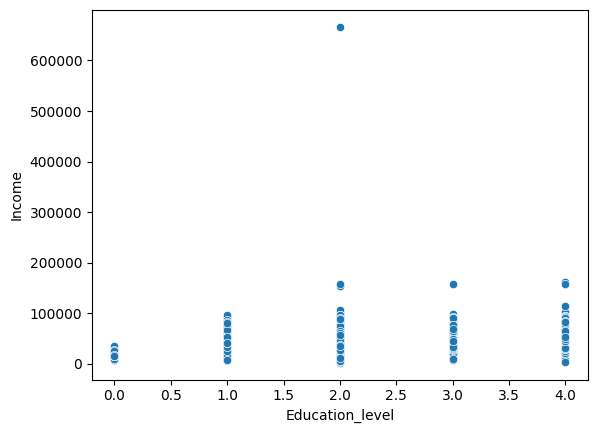

In [ ]:
sns.scatterplot( x=datos_marketing["Education_level"], y=datos_marketing["Income"])

In [ ]:
variables_numericas=["Education_level",'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2',"Income" ]
datos_marketing[variables_numericas].corr("kendall")


,Education_level,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Income
Education_level,1.000000,0.184680,-0.123017,0.056965,-0.125582,-0.126753,-0.100481,0.021000,0.077692,0.073690,0.073058,-0.046838,0.004020,0.056315,0.029443,-0.008692,0.017868,0.116179
MntWines,0.184680,1.000000,0.355030,0.619960,0.359565,0.348726,0.394415,0.048367,0.570764,0.645686,0.621260,-0.278469,0.028004,0.254377,0.300002,0.247188,0.113528,0.632614
MntFruits,-0.123017,0.355030,1.000000,0.532194,0.550344,0.542203,0.413511,-0.082540,0.350774,0.484286,0.435861,-0.321874,0.007065,0.023234,0.197142,0.146705,0.002116,0.399106
MntMeatProducts,0.056965,0.619960,0.532194,1.000000,0.540642,0.519801,0.457879,-0.010880,0.518283,0.685633,0.596073,-0.353870,0.006864,0.112925,0.271732,0.233000,0.051589,0.618775
MntFishProducts,-0.125582,0.359565,0.550344,0.540642,1.000000,0.544090,0.409233,-0.090923,0.345842,0.503529,0.430649,-0.332724,-0.020859,0.002520,0.181180,0.174974,-0.000480,0.397178
MntSweetProducts,-0.126753,0.348726,0.542203,0.519801,0.544090,1.000000,0.394494,-0.079877,0.345676,0.482933,0.435481,-0.328704,-0.013218,0.005291,0.212734,0.184205,-0.000930,0.391346
MntGoldProds,-0.100481,0.394415,0.413511,0.457879,0.409233,0.394494,1.000000,0.070664,0.423909,0.495854,0.392369,-0.185400,0.114825,0.054475,0.156956,0.145124,0.055875,0.341635
NumDealsPurchases,0.021000,0.048367,-0.082540,-0.010880,-0.090923,-0.079877,0.070664,1.000000,0.230311,-0.027142,0.083514,0.320012,-0.012911,-0.000719,-0.230771,-0.160379,-0.047755,-0.143148
NumWebPurchases,0.077692,0.570764,0.350774,0.518283,0.345842,0.345676,0.423909,0.230311,1.000000,0.475236,0.522876,-0.057476,0.027982,0.156646,0.150883,0.158864,0.031761,0.402639
NumCatalogPurchases,0.073690,0.645686,0.484286,0.685633,0.503529,0.482933,0.495854,-0.027142,0.475236,1.000000,0.547237,-0.417350,0.090193,0.164794,0.283625,0.262881,0.091247,0.618513


In [ ]:
datos_marketing[variables_numericas].corr()

,Education_level,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Income
Education_level,1.000000,0.215037,-0.076176,0.048746,-0.102180,-0.094367,-0.093662,0.033001,0.101154,0.085696,0.091191,-0.055965,0.003521,0.062780,0.035387,-0.002379,0.024119,0.149338
MntWines,0.215037,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,0.578650
MntFruits,-0.076176,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,0.430842
MntMeatProducts,0.048746,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,0.584633
MntFishProducts,-0.102180,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,0.532757,0.457745,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,0.438871
MntSweetProducts,-0.094367,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,-0.121432,0.333937,0.495136,0.455225,-0.422371,0.001780,0.029313,0.259230,0.245102,0.010188,0.440744
MntGoldProds,-0.093662,0.392731,0.396487,0.359446,0.427142,0.357450,1.000000,0.051905,0.407066,0.442428,0.389180,-0.247691,0.124958,0.024015,0.181397,0.170132,0.050734,0.325916
NumDealsPurchases,0.033001,0.008886,-0.134512,-0.121308,-0.143241,-0.121432,0.051905,1.000000,0.241440,-0.012118,0.066107,0.346048,-0.023135,0.016077,-0.184253,-0.127374,-0.037981,-0.083101
NumWebPurchases,0.101154,0.553786,0.302039,0.307090,0.299688,0.333937,0.407066,0.241440,1.000000,0.386868,0.516240,-0.051226,0.042958,0.162932,0.141189,0.159292,0.034829,0.387878
NumCatalogPurchases,0.085696,0.634753,0.486263,0.734127,0.532757,0.495136,0.442428,-0.012118,0.386868,1.000000,0.517840,-0.522004,0.104345,0.140182,0.322471,0.309026,0.099915,0.589162


<Axes: >

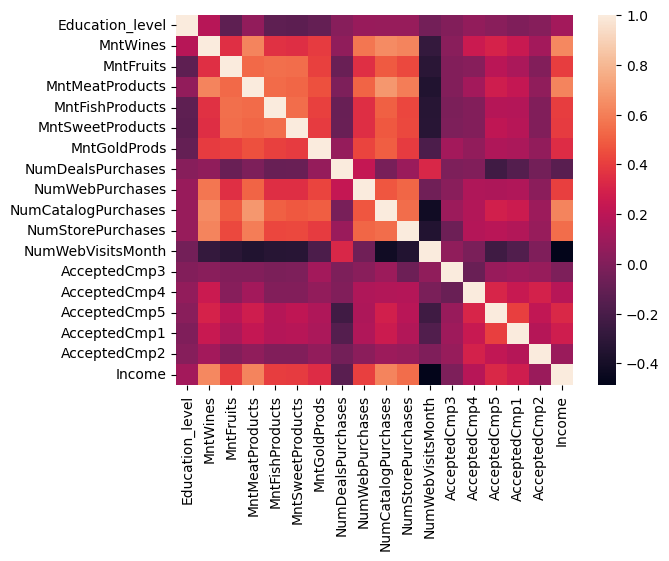

In [ ]:
sns.heatmap( datos_marketing[variables_numericas].corr("kendall"))

<Axes: >

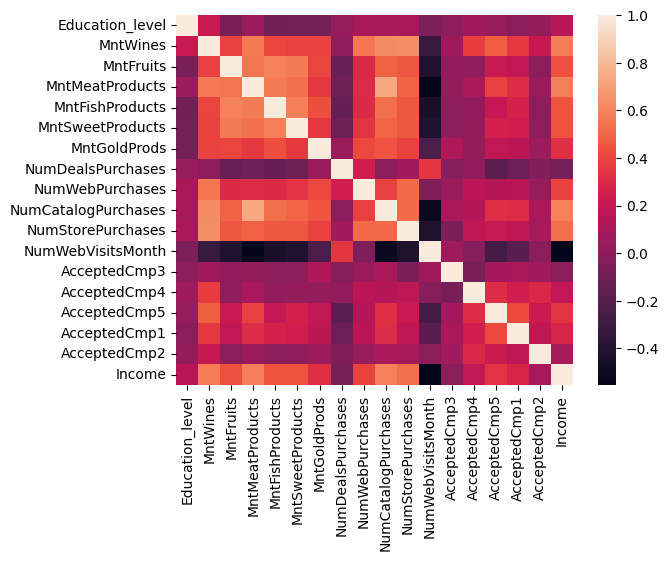

In [ ]:
sns.heatmap( datos_marketing[variables_numericas].corr())

# Correlación múltiple

Este concepto se refiere a la correlación entre una variable dependiente y varias variables independientes. En lugar de comparar solo dos variables, estás observando cómo una variable está relacionada con un conjunto de otras variables. En regresión múltiple, esta correlación se denota por

El **coeficiente de determinación** ($R^2$) es una medida que indica qué proporción de la varianza total en la variable dependiente está explicada por el modelo. La fórmula básica para $R^2$ es:

$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

Donde:
- $\text{SS}_{\text{res}}$ es la **suma de los cuadrados de los residuos** o errores (la diferencia entre los valores observados y los valores predichos por el modelo):
  $$
  \text{SS}_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
  Donde $y_i$ son los valores observados y $\hat{y}_i$ son los valores predichos.
  
- $\text{SS}_{\text{tot}}$ es la **suma total de cuadrados**, que mide la varianza total de los datos (la diferencia entre los valores observados y la media de los valores observados):
  $$
  \text{SS}_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2
  $$
  Donde $\bar{y}$ es la media de los valores observados.

### Interpretación:

- $R^2 = 1$: El modelo explica perfectamente la variación de los datos.
- $R^2 = 0$: El modelo no explica ninguna variación de los datos, es decir, el modelo es tan bueno como la media de los datos.
- $R^2$ negativo: Esto puede ocurrir si el modelo es peor que una línea horizontal en la media de los datos (ocurre en casos donde el ajuste no es adecuado).

En resumen, el coeficiente $R^2$ mide qué tan bien un modelo de regresión se ajusta a los datos observados, con valores más cercanos a 1 indicando un mejor ajuste.

Con el siguiente código se puede obtener un coeficiente $R^2$ para cada variable.

*Ver cuál es la más predecible entre todas, haciendo una regresión lineal.

¿Qué observan?



In [ ]:
def correlacion_multiple(datos_numericos):
  S= datos_numericos.cov()
  S_inv= np.linalg.inv(S)
  Vector_Corre_Multiples = pd.Series((1 - 1/ (np.diag(S) * np.diag(S_inv))), index= datos_numericos.columns)
  return Vector_Corre_Multiples
correlacion_multiple(datos)

,0
BALANCE,0.623884
BALANCE_FREQUENCY,0.223834
PURCHASES,0.999979
ONEOFF_PURCHASES,0.999965
INSTALLMENTS_PURCHASES,0.999883
CASH_ADVANCE,0.653212
PURCHASES_FREQUENCY,0.905363
ONEOFF_PURCHASES_FREQUENCY,0.743770
PURCHASES_INSTALLMENTS_FREQUENCY,0.892590
CASH_ADVANCE_FREQUENCY,0.705736


¿Qué quiere decir esto?

# Análisis de componentes principales

La ecuación básica del **modelado de componentes principales (PCA)** es una transformación lineal que convierte las variables originales en un conjunto de nuevas variables, llamadas **componentes principales**, que son combinaciones lineales de las originales.



Cada componente principal $Z_i$ se puede representar como una combinación lineal de las variables originales $X_1, X_2, ..., X_p$, según la siguiente ecuación:

$$
Z_1 = w_{11}X_1 + w_{12}X_2 + \dots + w_{1p}X_p
$$
$$
Z_2 = w_{21}X_1 + w_{22}X_2 + \dots + w_{2p}X_p
$$
$$
\vdots
$$
$$
Z_m = w_{m1}X_1 + w_{m2}X_2 + \dots + w_{mp}X_p
$$

Donde:
- $Z_1, Z_2, ..., Z_m$ son los componentes principales.
- $w_{ij}$ son los coeficientes de los eigenvectores (los elementos de la matriz \(W\)).
- $X_1, X_2, ..., X_p$ son las variables originales.

### Propiedades clave:
- Los componentes principales son **no correlacionados** entre sí.
- El primer componente principal (\(Z_1\)) captura la mayor cantidad de **varianza** de los datos, el segundo componente (\(Z_2\)) captura la segunda mayor cantidad de varianza, y así sucesivamente.
  



# Tarjetas de crédito

Con la función PCA podemos implementar

In [ ]:
num_variables= datos.shape[1]
scale_feature=StandardScaler().fit_transform( datos )
pca= PCA(num_variables )
pca.fit( scale_feature)

PCA(n_components=16)

In [ ]:
pd.DataFrame(pca.fit_transform( scale_feature)).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000e+00,-7.382610e-17,2.702977e-16,-1.966601e-16,-2.012711e-17,2.396123e-16,-4.274249e-17,5.022989e-17,3.120605e-18,-8.903228e-18,2.004950e-16,1.674171e-16,3.450545e-17,7.224575e-17,2.709811e-17,-4.510519e-17
1,-7.382610e-17,1.000000e+00,1.776470e-16,-6.175598e-16,1.887258e-16,2.377091e-16,1.738929e-16,-3.629973e-18,-6.153172e-17,-1.493601e-16,4.382492e-16,-4.269457e-16,-2.574628e-16,-3.970748e-17,-7.756411e-17,2.852737e-17
2,2.702977e-16,1.776470e-16,1.000000e+00,6.235045e-16,2.661901e-16,6.596865e-17,-1.270123e-17,-4.344045e-16,2.036240e-16,-1.075436e-16,-5.027182e-16,3.378252e-16,-1.364817e-16,-1.005661e-17,-2.389624e-16,-7.562127e-17
3,-1.966601e-16,-6.175598e-16,6.235045e-16,1.000000e+00,8.357667e-17,-5.463837e-17,1.804381e-17,-1.824210e-16,1.294120e-17,-2.220332e-16,6.427002e-16,-1.985801e-16,-1.882711e-16,-2.253975e-16,3.183412e-18,-8.424010e-17
4,-2.012711e-17,1.887258e-16,2.661901e-16,8.357667e-17,1.000000e+00,-5.638718e-16,1.399225e-16,4.711437e-17,-2.784947e-16,-1.462045e-16,-3.277914e-17,3.973430e-16,1.172594e-16,-9.393848e-17,3.538264e-17,7.915865e-17
5,2.396123e-16,2.377091e-16,6.596865e-17,-5.463837e-17,-5.638718e-16,1.000000e+00,-3.497320e-16,-5.620683e-17,-1.954551e-16,-2.885111e-16,9.011376e-17,3.239460e-16,-2.329258e-17,-4.786894e-17,1.923974e-18,9.577039e-17
6,-4.274249e-17,1.738929e-16,-1.270123e-17,1.804381e-17,1.399225e-16,-3.497320e-16,1.000000e+00,1.737544e-16,-2.974928e-16,3.082171e-17,-1.941139e-16,-1.509493e-16,-2.351429e-16,2.076947e-17,-1.221480e-16,-9.099272e-17
7,5.022989e-17,-3.629973e-18,-4.344045e-16,-1.824210e-16,4.711437e-17,-5.620683e-17,1.737544e-16,1.000000e+00,6.341399e-16,-2.356820e-16,6.306239e-17,-9.769338e-17,-2.805121e-17,-1.044268e-16,-2.909891e-17,3.451731e-17
8,3.120605e-18,-6.153172e-17,2.036240e-16,1.294120e-17,-2.784947e-16,-1.954551e-16,-2.974928e-16,6.341399e-16,1.000000e+00,-9.482800e-18,-2.667294e-16,8.399989e-17,2.170673e-16,2.295379e-16,-2.840336e-16,9.953771e-17
9,-8.903228e-18,-1.493601e-16,-1.075436e-16,-2.220332e-16,-1.462045e-16,-2.885111e-16,3.082171e-17,-2.356820e-16,-9.482800e-18,1.000000e+00,-2.841823e-16,1.131515e-16,-1.732052e-16,2.796972e-18,-9.463013e-17,-1.248698e-16


Valor propio de la componente.

In [ ]:
pca.explained_variance_

array([4.60773205e+00, 3.46398093e+00, 1.51430913e+00, 1.22257177e+00,
       1.06482577e+00, 8.65366437e-01, 7.23486641e-01, 6.32799387e-01,
       5.24659054e-01, 4.04449560e-01, 3.02419045e-01, 2.47494918e-01,
       2.02501710e-01, 1.78799717e-01, 4.64450737e-02, 1.17321509e-05])

Proporción de varianza explicada por cada componente


In [ ]:
pd.Series(pca.explained_variance_ratio_)

,0
0,2.879499e-01
1,2.164737e-01
2,9.463336e-02
3,7.640189e-02
4,6.654390e-02
5,5.407914e-02
6,4.521268e-02
7,3.954538e-02
8,3.278739e-02
9,2.527517e-02


Varianza explicada acumulada

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.28794991, 0.50442364, 0.59905701, 0.67545889, 0.7420028 ,
       0.79608194, 0.84129462, 0.88084   , 0.91362739, 0.93890256,
       0.95780157, 0.97326821, 0.9859231 , 0.99709679, 0.99999927,
       1.        ])

Text(0, 0.5, 'Varianza explicada acumulada')

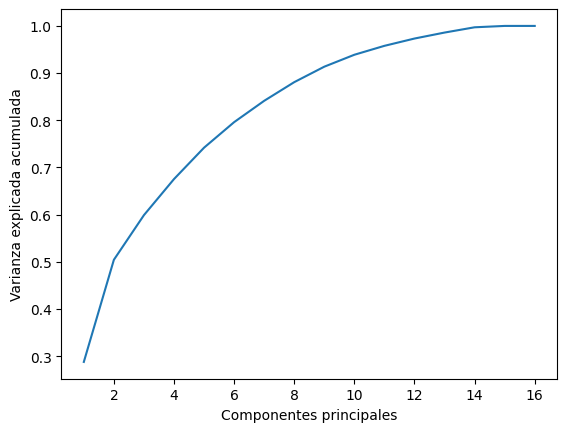

In [ ]:
sns.lineplot( x=range(1, num_variables+1), y=pca.explained_variance_ratio_.cumsum())
plt.xlabel("Componentes principales")
plt.ylabel("Varianza explicada acumulada")

*Notas:
Correlación: Relación lineal entre las variables originales y las componentes principales. Una correlación alta sugiere que la componente captura una gran parte de la varianza de las variables originales relacionadas.
Valor propio: Representa la varianza explicada por cada componente. Valores propios más altos indican componentes que explican una mayor proporción de la varianza total.

Extraer componentes

In [ ]:
pca= PCA(6)
pca.fit( scale_feature)

PCA(n_components=6)

In [ ]:
pd.DataFrame(pca.components_.T, index= datos.columns)

,0,1,2,3,4,5
BALANCE,0.091471,0.405980,-0.165108,0.286606,0.100634,-0.249262
BALANCE_FREQUENCY,0.108653,0.127755,-0.453013,0.204101,-0.439300,0.063576
PURCHASES,0.414047,0.049015,0.241090,0.100842,0.014853,0.264667
ONEOFF_PURCHASES,0.348531,0.069485,0.369073,0.165076,-0.169417,0.190837
INSTALLMENTS_PURCHASES,0.338312,-0.011882,-0.108201,-0.064993,0.346484,0.275103
CASH_ADVANCE,-0.029117,0.437180,-0.010858,-0.297788,0.068706,-0.080738
PURCHASES_FREQUENCY,0.325307,-0.187016,-0.366063,-0.199834,-0.104261,-0.152464
ONEOFF_PURCHASES_FREQUENCY,0.295714,-0.015086,0.104488,0.086528,-0.521025,-0.270605
PURCHASES_INSTALLMENTS_FREQUENCY,0.278284,-0.173923,-0.460345,-0.263068,0.156394,0.017492
CASH_ADVANCE_FREQUENCY,-0.096986,0.429933,-0.099726,-0.244537,-0.170625,0.177052


<Axes: >

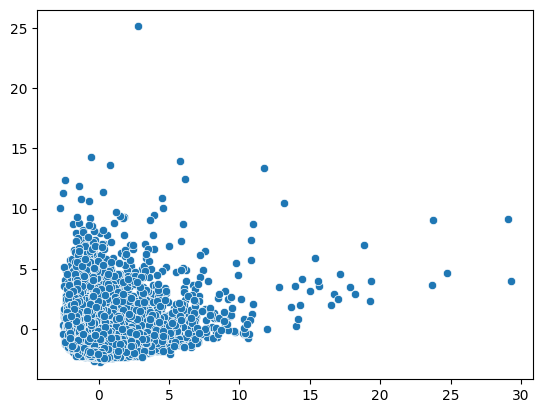

In [ ]:
z_componentes= pca.fit_transform(scale_feature)

sns.scatterplot( x=z_componentes[:,0], y=z_componentes[:,1])


Graficadando dos componentes estaría solo explicando el 50% de los datos. Entonces, hay que tener mucho cuidado.

In [ ]:
px.scatter_3d( x=z_componentes[:,0], y=z_componentes[:,1], z=z_componentes[:,2])

## Implementación K-means


Utilizando todas las variables

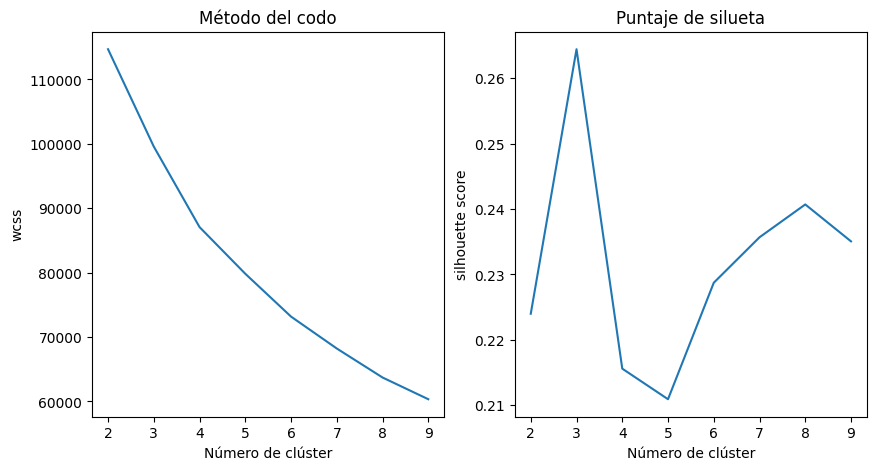

In [ ]:
silueta_score=[] # puntaje de silueta
wcss =[] #
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k, random_state=123)
  k_means.fit(scale_feature)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(scale_feature, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

Utilizando análisis de componentes principales.

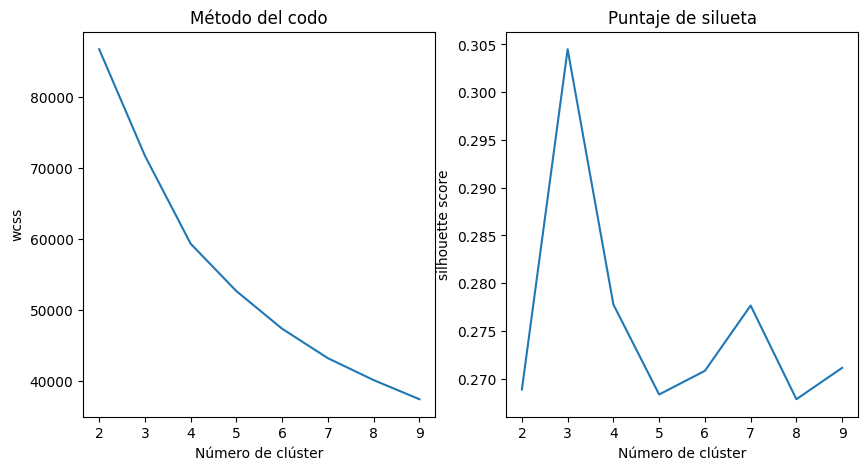

In [ ]:

silueta_score=[] # puntaje de silueta
wcss =[] #
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k, random_state=123)
  k_means.fit(z_componentes)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(z_componentes, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

In [ ]:
k_means=KMeans(3, random_state=123)
k_means.fit(scale_feature)
labels_k= pd.Series(k_means.labels_).astype(str)
px.scatter_3d( x=z_componentes[:,0], y=z_componentes[:,1], z=z_componentes[:,2], color=labels_k)

Text(0, 0.5, 'Componente 2 21%')

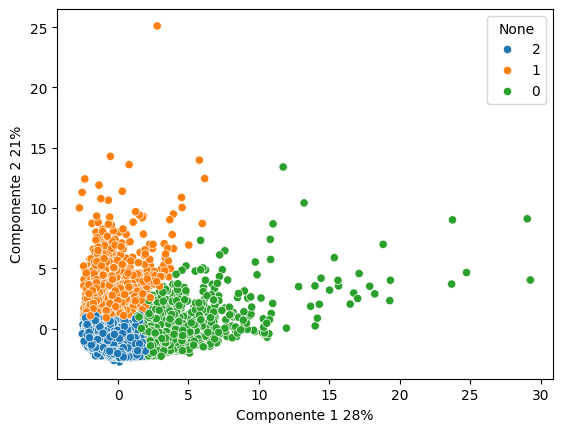

In [ ]:
sns.scatterplot( x=z_componentes[:,0], y=z_componentes[:,1], hue=labels_k)
plt.xlabel("Componente 1 28%")
plt.ylabel("Componente 2 21%")

In [ ]:
#Utilizando los componentes principales
k_means=KMeans(3, random_state=123)
k_means.fit(z_componentes)
labels_k= pd.Series(k_means.labels_).astype(str)
px.scatter_3d( x=z_componentes[:,0], y=z_componentes[:,1], z=z_componentes[:,2], color=labels_k)

# T-sne

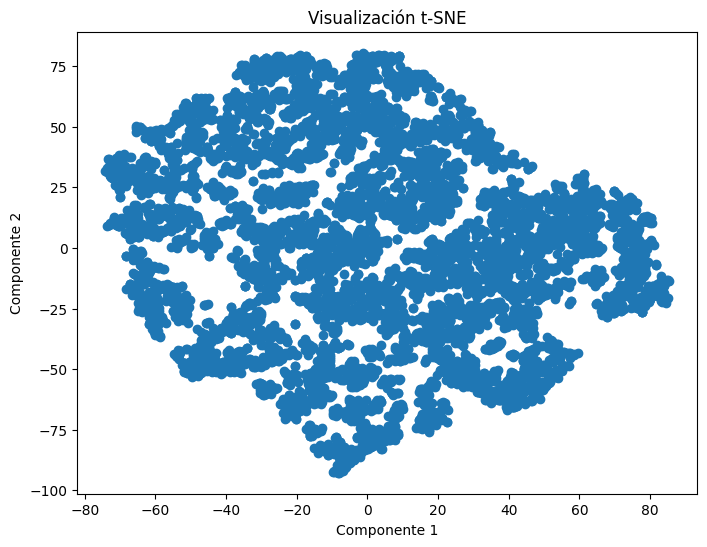

In [ ]:
tsne = TSNE(n_components=2, random_state=42)

# Ajustar el modelo y transformar los datos
X_embedded = tsne.fit_transform(scale_feature)

# Graficar los resultados en 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.title("Visualización t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()